Ujian Praktek Domain AI - Data Science

Nama : Salsa Dwi Nur Hidayah

Kelas : Goldfarb

# Classification 4 Animal

# 1. Importing packages

Melakukan Import semua package dan Library yang dibutuhkan

In [22]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import dataset

In [13]:
path = '/content/drive/MyDrive/4-animal-classification'

# 2. Visualising data

Menampilkan data training yang terdapat didataset dalam bentuk tabel dan plot bar chart. lalu tampilkan 10 citra awal yang sudah dilabeli disertai nama hewannya.

In [14]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,cat,700
1,deer,600
2,dog,900
3,horse,600


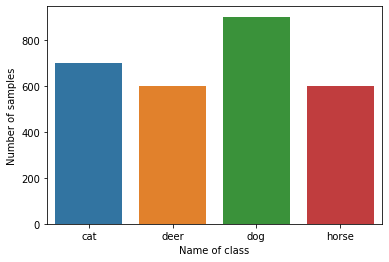

In [15]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

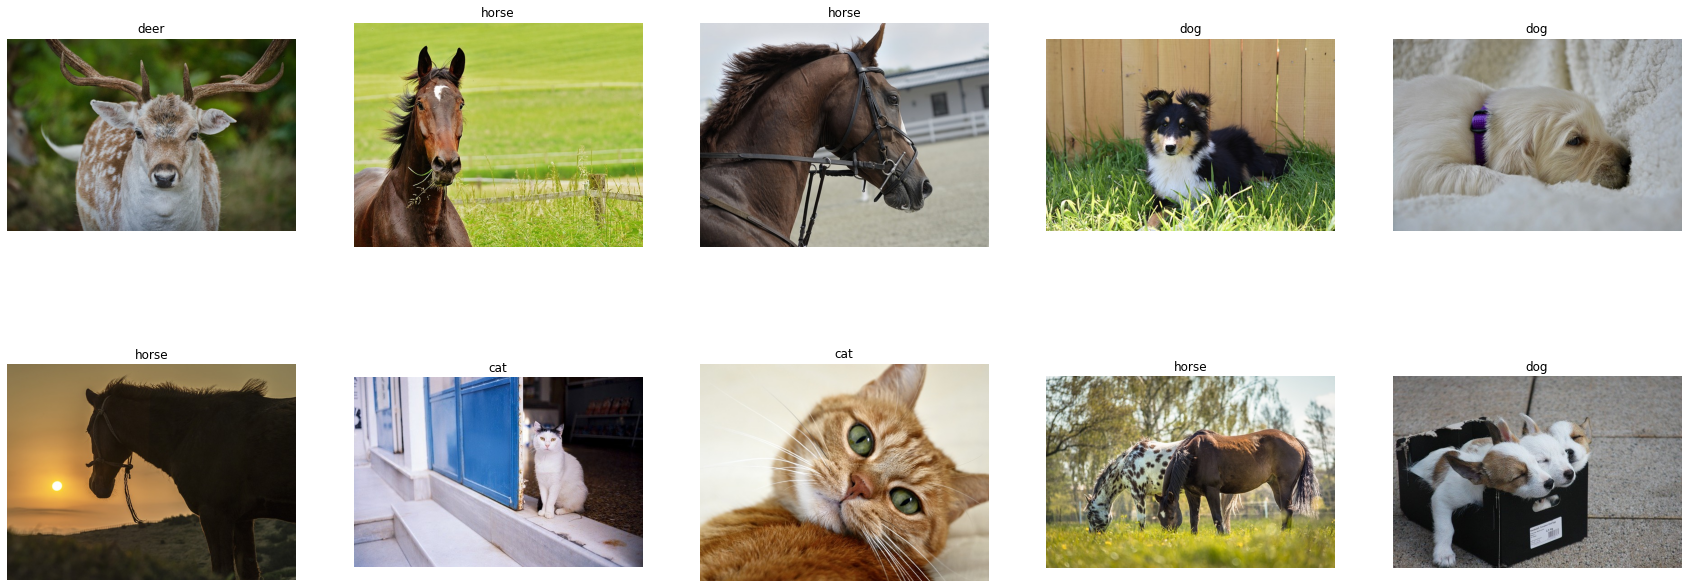

In [16]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

# 3. Preparing the data

Mempersiapkan data training untuk digunakan dalam menentukan nilai training dan nilai validasi dengan masing masing target_size dan batch_size nilainya sama.
target_size (24,24)

In [17]:
image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

Menampilkan banyak citra dan kelasnya.

In [18]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32 )

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


# 4. Building the model

Membangun arsitektur dengan mobilenet menggunakan activation relu dan softmax dengan intuisi depth (1036,518,4)

In [19]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer

mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1036, activation="relu"))
model.add(Dense(518, activation="relu"))
model.add(Dense(4, activation="softmax" , name="classification"))

17235968/17225924 [==============================] - 0s 0us/step


Compile model arsitektur mobilenet dengan loss kategori crossentropy
dan tampilkan daftar ringkasannya

In [20]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0005,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 1036)              1061900   
                                                                 
 dense_1 (Dense)             (None, 518)               537166    
                                                                 
 classification (Dense)      (None, 4)                 2

# 5. Training and evaluating

Selanjutnya training data yang sudah disiapkan dengan epoch=10

In [21]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 10)

Epoch 1/10
70/70 [==============================] - 865s 12s/step - loss: 0.8630 - accuracy: 0.6875 - val_loss: 0.4490 - val_accuracy: 0.8518
Epoch 2/10
70/70 [==============================] - 450s 6s/step - loss: 0.3209 - accuracy: 0.9080 - val_loss: 0.3037 - val_accuracy: 0.8946
Epoch 3/10
70/70 [==============================] - 448s 6s/step - loss: 0.2115 - accuracy: 0.9366 - val_loss: 0.2087 - val_accuracy: 0.9339
Epoch 4/10
70/70 [==============================] - 452s 6s/step - loss: 0.1632 - accuracy: 0.9478 - val_loss: 0.1750 - val_accuracy: 0.9500
Epoch 5/10
70/70 [==============================] - 450s 6s/step - loss: 0.1360 - accuracy: 0.9589 - val_loss: 0.1633 - val_accuracy: 0.9536
Epoch 6/10
70/70 [==============================] - 458s 7s/step - loss: 0.1367 - accuracy: 0.9594 - val_loss: 0.1859 - val_accuracy: 0.9321
Epoch 7/10
70/70 [==============================] - 460s 7s/step - loss: 0.1043 - accuracy: 0.9688 - val_loss: 0.1431 - val_accuracy: 0.9446
Epoch 8/10
7

Visualisasikan hasil model evaluasinya

18/18 [==============================] - 30s 1s/step - loss: 0.1397 - accuracy: 0.9518


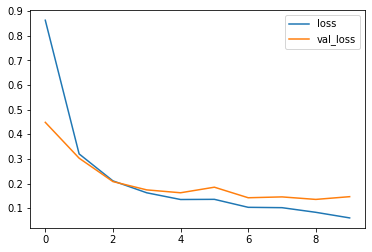

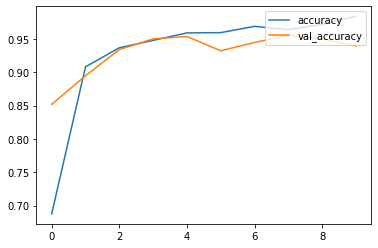

In [23]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# 6. Preparing for submission

Mempersiapkan data file csv dan data testing dengan tujuan pelabelan pada data testing dan disematkan dalam file .csv dengan format menjadi integer  0/1/2/3.

In [28]:
sub_csv ='/content/drive/MyDrive/4-animal-classification/Sample_submission.csv'
path_test = '/content/drive/MyDrive/4-animal-classification/test/test'

In [29]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

,ID,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,0
6,7,0
7,8,0
8,9,0
9,10,0


In [31]:
# each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


In [32]:
# we will replace the previous empty columns with the new predictions    
    
df_sub['Label'] = labels
df_sub.head(10)

,ID,Label
0,1,1
1,2,0
2,3,2
3,4,3
4,5,2
5,6,1
6,7,3
7,8,0
8,9,3
9,10,2


In [33]:
# saving file
df_sub.to_csv('submission_file.csv',index=False)

**Kesimpulan:**

Dibuktikan dengan hasil evaluasi nilai loss: 0.1397 dan nilai accuracy: 0.95189 arsitektur model mobilnet ini sudah cukup bagus untuk klasifikasi 4 hewan yang berbeda. Namun untuk kelemahannya membutuhkan waktu yang cukup lama karna data yang digunakan sangat banyak dan menggunakan learning rate yang cukup rendah.